### importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading the csv file

In [2]:
df = pd.read_csv('Uber Request Data.csv',parse_dates = ['Request timestamp','Drop timestamp'])

In [3]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [5]:
df.isnull().any()

Request id           False
Pickup point         False
Driver id             True
Status               False
Request timestamp    False
Drop timestamp        True
dtype: bool

#### Here we can see that there are null values in the columns Driver id and Dror Timestamp

### Checking the percentage of null data in each column

In [6]:
round(100*(df.isnull().sum())/len(df.index) , 2)

Request id            0.00
Pickup point          0.00
Driver id            39.29
Status                0.00
Request timestamp     0.00
Drop timestamp       58.03
dtype: float64

In [7]:
df['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

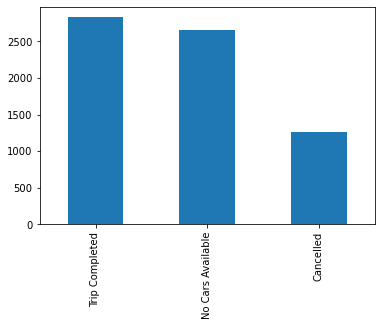

In [8]:
df['Status'].value_counts().plot(kind = 'bar')
plt.show()

### Here we can see that there are two types of problems that are request cancellation and No Cars Available

### Now lets analyse which request is most problematic in which time slot

### Creating a new data frame for the cancelled request or no cars available

In [9]:
df1 = df[df['Status'] != 'Trip Completed']
df1

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT
2835,2347,Airport,2.0,Cancelled,2016-12-07 19:14:00,NaT
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


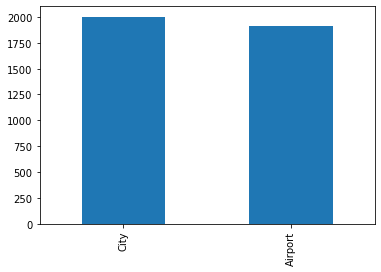

In [10]:
df1['Pickup point'].value_counts().plot(kind = 'bar')
plt.show()

#### Here in the above graph we can see that the requests are cancelled or showing 'No Cars Available' most frequently when the request type is from City to Airport

In [11]:
hour = []

for x in df1['Request timestamp']:
    hour.append(x.hour)
    
df1['HOUR Of Request'] = hour

df1

/var/folders/lp/mg2w6c595fgfhb3mgbjx_ysw0000gn/T/ipykernel_11828/2822962907.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['HOUR Of Request'] = hour


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,HOUR Of Request
2831,2905,City,1.0,Cancelled,2016-07-13 06:08:41,NaT,6
2832,4805,City,1.0,Cancelled,2016-07-14 17:07:58,NaT,17
2833,5202,Airport,1.0,Cancelled,2016-07-14 20:51:37,NaT,20
2834,5927,City,1.0,Cancelled,2016-07-15 10:12:40,NaT,10
2835,2347,Airport,2.0,Cancelled,2016-12-07 19:14:00,NaT,19
...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23


### Percentage of requests that are either cancelled or 'No Cars Available'

In [16]:
round(100*(len(df1.index)/len(df.index)),2)

58.03

/var/folders/lp/mg2w6c595fgfhb3mgbjx_ysw0000gn/T/ipykernel_11828/712404448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Time_slot'] =(np.select(condlist = [(df1['HOUR Of Request']>=0) & (df1['HOUR Of Request']<=6) , (df1['HOUR Of Request'] >6) & (df1['HOUR Of Request']<12) , (df1['HOUR Of Request']>=12) & (df1['HOUR Of Request']<16) , (df1['HOUR Of Request']>=16) & (df1['HOUR Of Request']<20) ],choicelist = ['Early Morning','Morning','Afternoon','Evening'],default = 'Late Evening'))


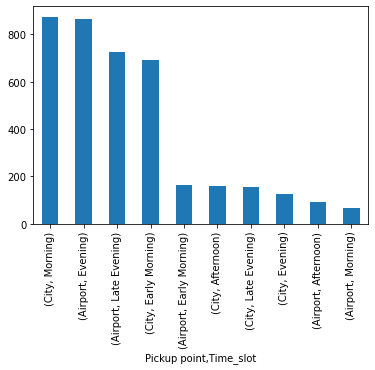

In [12]:
df1['Time_slot'] =(np.select(condlist = [(df1['HOUR Of Request']>=0) & (df1['HOUR Of Request']<=6) , (df1['HOUR Of Request'] >6) & (df1['HOUR Of Request']<12) , (df1['HOUR Of Request']>=12) & (df1['HOUR Of Request']<16) , (df1['HOUR Of Request']>=16) & (df1['HOUR Of Request']<20) ],choicelist = ['Early Morning','Morning','Afternoon','Evening'],default = 'Late Evening'))
                                                                                            
df1[['Pickup point','Time_slot']].value_counts().plot(kind = 'bar')
plt.show()

#### From the above bar graph we can see that most problematic types of requet is City-Airport in the Morning

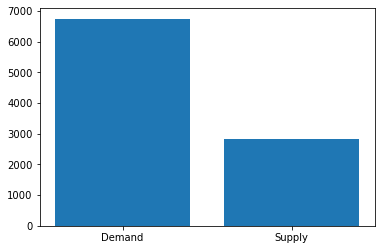

In [13]:

names = np.array(['Demand','Supply'])
values = np.array([len(df.index),len((df[df['Status'] == 'Trip Completed']).index)])
plt.bar(names,values)
plt.show()

### Here in the above graph we can see that there is a huge gap between the Demand and Supply

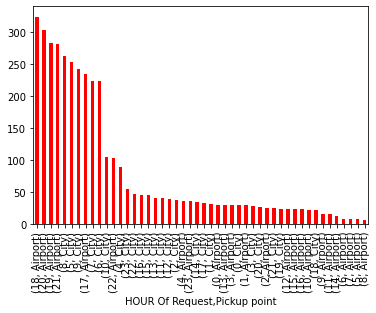

In [14]:
df1[['HOUR Of Request','Pickup point']].value_counts().plot(kind = 'bar',color = 'red')
plt.show()

#### As we can see in the above graph the demand is more but the supply is less when the type of request is Airport - City at 6:00pm in the evening 